# Лабораторная работа 2. Шкалы измерения

## Можно использовать данные:

Задание 1, 2, 3: Определение типа шкалы измерения, Приведение данных к нужной шкале, Анализ данных с использованием различных шкал измерения
Набор данных "Titanic" с Kaggle, который содержит данные о пассажирах корабля, включая пол, возраст и класс билета (номинальная, порядковая и шкала отношений соответственно). 
Ссылка: https://www.kaggle.com/c/titanic/ta
a

Задание 4: Визуализация данных в зависимости от шкалы измерения
Можно использовать набор данных "World Happiness Report" с Kaggle, который содержит данные о счастье в разных странах и его соотношении с экономическими, социальными и здоровьесберегающими факторами.
Ссылка: https://www.kaggle.com/unsdsn/world-happineдание 5: ss

ЗаПроверка гипотеза гипотез
Набор данных "Students Performance in Exams" с Kaggle. Этот набор данных включает оценки студентов по математике, чтению и письму, и тут можно провести t-тест для сравнения средних оценок между группами (например, между мужчинами и женщинами).
Ссылка: https://www.kaggle.com/spscientist/students.том сайте.


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

Внесем сразу все предложенные наборы данных, потом, по мере необходимости, будем работать с ними.

In [4]:
df_titanic = pd.read_csv(r'D:/Faculty-of-Applied-Mathematics-and-Computer-Science/Computer Science/Methods and Algorithms of Data Analysis/Laboratory 2/Datasets/Titanic.csv')
df_happy = pd.read_csv(r'D:/Faculty-of-Applied-Mathematics-and-Computer-Science/Computer Science/Methods and Algorithms of Data Analysis/Laboratory 2/Datasets/Happy.csv')
df_stud = pd.read_csv(r'D:/Faculty-of-Applied-Mathematics-and-Computer-Science/Computer Science/Methods and Algorithms of Data Analysis/Laboratory 2/Datasets/StudentsPerformance.csv')

## Задание 1. Определение типа шкалы измерения.

Создайте список, состоящий из различных типов данных (например, возраст, пол, уровень образования, зарплата и т.д.). Затем создайте функцию на Python, которая будет проходить через каждый элемент этого списка и определять тип шкалы измерения (номинальная, порядковая, интервальная, отношения).

Для первых трех заданий будет использоваться датасет Титаника, в котором сразу я оставлю только 3 столбца: Pclass, Sex, Age.

In [6]:
df_titanic = df_titanic.drop(columns=['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

df_titanic

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,NaN
889,1,male,26.0


Как мы можем заметить, в столбце возраста присутствуют неопределенные значения, посчитаем их количество.

In [8]:
df_titanic.isna().sum()

Pclass      0
Sex         0
Age       177
dtype: int64

Удалим все строки с пустыми значениями в столбце возраста

In [10]:
df_titanic = df_titanic.dropna().reset_index()

df_titanic

,index,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,2,3,female,26.0
3,3,1,female,35.0
4,4,3,male,35.0
...,...,...,...,...
709,885,3,female,39.0
710,886,2,male,27.0
711,887,1,female,19.0
712,889,1,male,26.0


In [50]:
def typeofcolumn(df):
    titanic = []
    titanic = df.columns[1:]
    
    for a in titanic:
        if df[a].dtype == 'int64':
            print(f'Столбец {a} отражает шкалу отношений')
        elif df[a].dtype == 'object':
            print(f'Столбец {a} отражает номинальную шкалу')
        else:
            print(f'Столбец {a} отражает порядковую шкалу')

typeofcolumn(df_titanic)

Столбец Pclass отражает шкалу отношений
Столбец Sex отражает номинальную шкалу
Столбец Age отражает порядковую шкалу


## Задание 2. Приведение данных к нужной шкале.

Создайте датафрейм с данными, которые необходимо привести к номинальной или порядковой шкале. Создайте функцию на Python, которая преобразует эти данные в нужные шкалы. 
Будем приводить к номинальной шкале по следующему принципу:
1. Возраст.
   - До 20 лет - "Молодой";
   - 20-40 лет - "Среднего возраста";
   - Больше 40 лет - "Старый";
2. Класс билета.
   - 1 класс - "Эконом";
   - 2 класс - "Средний";
   - 3 класс - "Премиум".

In [13]:
def to_nominal(df):
    df_nominal = pd.DataFrame(columns=['Pclass', 'Sex', 'Age'])

    for index, row in df.iterrows():
        if pd.isnull(row['Age']):
            age_group = 'unknown'
        elif row['Age'] < 20:
            age_group = 'young'
        elif row['Age'] >= 20 and row['Age'] < 40:
            age_group = 'middle aged'
        else:
            age_group = 'old'

        if row['Pclass'] == 1:
            pclass_group = 'cheap'
        elif row['Pclass'] == 2:
            pclass_group = 'middle'
        elif row['Pclass'] == 3:
            pclass_group = 'premium'

        temp_df = pd.DataFrame({'Pclass': [pclass_group], 'Sex': [row['Sex']], 'Age': [age_group]})
        df_nominal = pd.concat([df_nominal, temp_df], ignore_index=True)

    return df_nominal

to_nominal(df_titanic)

,Pclass,Sex,Age
0,premium,male,middle aged
1,cheap,female,middle aged
2,premium,female,middle aged
3,cheap,female,middle aged
4,premium,male,middle aged
...,...,...,...
709,premium,female,middle aged
710,middle,male,middle aged
711,cheap,female,young
712,cheap,male,middle aged


## Задание 3. Анализ данных с использованием различных шкал измерения.
Создайте датафрейм с данными различных типов (к примеру, пол, возраст, уровень образования, баллы за тест). Проанализируйте эти данные с использованием функций Python, которые соответствуют типу шкалы каждого элемента данных (например, мода для номинальной шкалы, медиана для порядковой шкалы, среднее значение для интервальной и отношения).

Посколько ранее мы уже выяснили, что 
- "Pclass" отображает шкалу отношений, то для нее будем считать среднее значение;
- "Sex" отображает номинальную шкалу, то для нее будем считать моду;
- "Age" отображает порядковую шкаолу, то для нее считаем медиану. 

In [15]:
def stats(df):
    print(f'Среднее значение для класса билетов: {df['Pclass'].mean()}')
    print(f'Мода пола: {df['Sex'].mode()}')
    print(f'Медиана возраста: {df['Age'].median()}')

stats(df_titanic)

Среднее значение для класса билетов: 2.2366946778711485
Мода пола: 0    male
Name: Sex, dtype: object
Медиана возраста: 28.0


Таким образом, 
- среднее значение класса билета равно ~2.23;
- большая часть пассажиров была мужского пола;
- медиана возраста равна 28 годам.

## Задание 4. Визуализация данных в зависимости от шкалы измерения.

Ваша задача создать визуализации для различных типов шкал. Возьмите набор данных и создайте различные виды диаграмм (например, столбчатые диаграммы для номинальной шкалы, гистограммы для порядковой, интервальной и шкалы отношений).

Аналогично датасету титаник, проверим датасет счастья на пустые значения.

In [18]:
df_happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [55]:
df_happy.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [19]:
df_happy.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Сразу видим, что датасет у нас без неопределенных значений, соответственно, сразу построим диаграммы.

Для этого выясним, какой столбец является каким.

In [21]:
typeofcolumn(df_happy)

Столбец Country отражает номинальную шкалу
Столбец Region отражает номинальную шкалу
Столбец Happiness Rank отражает шкалу отношений
Столбец Happiness Score отражает порядковую шкалу
Столбец Standard Error отражает порядковую шкалу
Столбец Economy (GDP per Capita) отражает порядковую шкалу
Столбец Family отражает порядковую шкалу
Столбец Health (Life Expectancy) отражает порядковую шкалу
Столбец Freedom отражает порядковую шкалу
Столбец Trust (Government Corruption) отражает порядковую шкалу
Столбец Generosity отражает порядковую шкалу
Столбец Dystopia Residual отражает порядковую шкалу


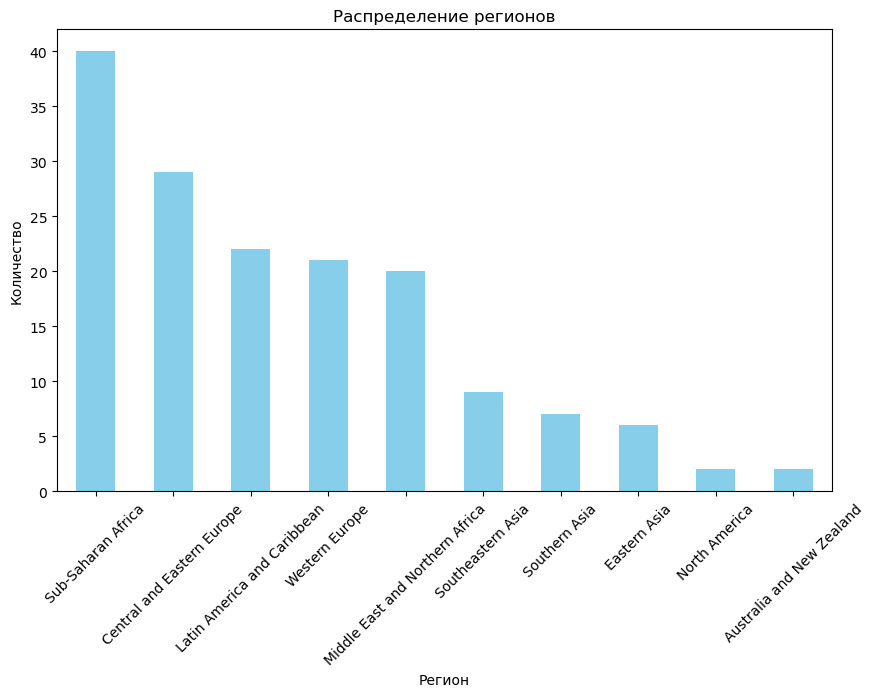

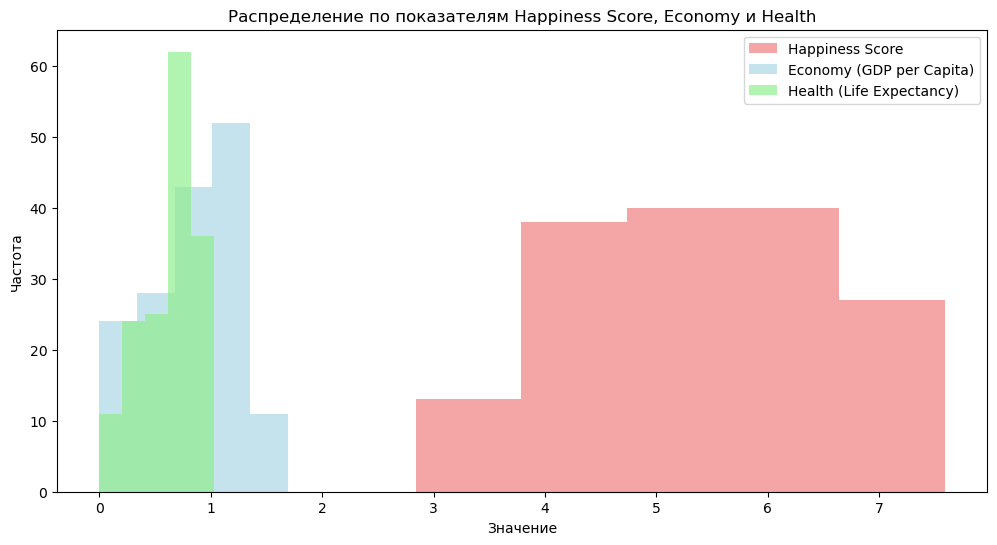

In [22]:
def create_charts(df):
    plt.figure(figsize=(10, 6))
    df['Region'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Распределение регионов')
    plt.xlabel('Регион')
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.hist(df['Happiness Score'], bins=5, color='lightcoral', alpha=0.7, label='Happiness Score')
    plt.hist(df['Economy (GDP per Capita)'], bins=5, color='lightblue', alpha=0.7, label='Economy (GDP per Capita)')
    plt.hist(df['Health (Life Expectancy)'], bins=5, color='lightgreen', alpha=0.7, label='Health (Life Expectancy)')
    plt.legend()
    plt.title('Распределение по показателям Happiness Score, Economy и Health')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.show()

create_charts(df_happy)

## Задание 5. Проверка гипотез
Сгенерируйте два шкалированных ряда данных и проверьте статистически значимые различия между ними с использованием t-теста. Визуализируйте эти данные и результаты своего анализа.
Рассмотрим наш датасет на наличие пустот.


In [24]:
df_stud

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [25]:
df_stud.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Пустые значения у нас отсутствуют, поэтому сразу перейдем к выполнению задания.

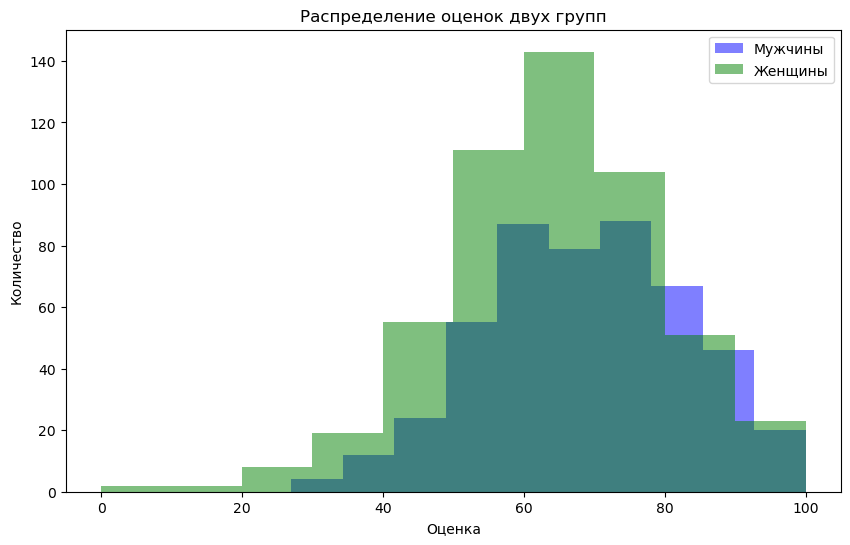

p-значение t-статистики равно 9.120185549328822e-08


In [27]:
def analyze_data(group1, group2):
    t_stat, p_val = ttest_ind(group1, group2)

    plt.figure(figsize=(10, 6))
    plt.hist(group1, alpha=0.5, label='Мужчины', color='blue')
    plt.hist(group2, alpha=0.5, label='Женщины', color='green')
    plt.xlabel('Оценка')
    plt.ylabel('Количество')
    plt.title('Распределение оценок двух групп')
    plt.legend()
    plt.show()

    print(f'p-значение t-статистики равно {p_val}')

group1 = df_stud[df_stud['gender'] == 'male']['math score']
group2 = df_stud[df_stud['gender'] == 'female']['math score']
 
analyze_data(group1, group2)

Поскольку p-value $= 9.12 \cdot 10^{-8} < 0.05$, то мы можем сказать, что различия между группами статистически значимы.